---
title: Discrete Fourier Transform
---

Recall that a frequency $f$ is called Fourier Frequency (with respect to a sample size $n$) of $nf$ is an integer. 

Sinuosoids corresponding to Fourier frequencies will have an integer number of complete cycles within the observation interval. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

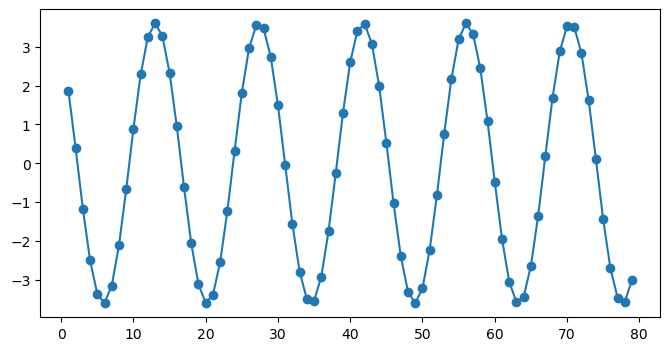

In [3]:
#Repeat the following plot when f is a Fourier frequency (e.g., f = 5/n) and when f is not a Fourier frequency (e.g., f = 5.5/n), and try to tell the difference from the plot
n = 79
f = 5.5/n #this is a Fourier frequency
t = np.arange(1, n+1)
y = 3 * np.cos(2 * np.pi * f * t) - 2 * np.sin(2 * np.pi * f * t)
plt.figure(figsize = (8, 4))
plt.plot(t, y, '-o')
plt.show()

Sinusoids at Fourier frequencies $f \in (0, 0.5)$ have the following remarkable orthogonality properties: 

1. Zero mean: $\sum_{t=1}^n \cos(2 \pi f t) = \sum_{t = 1}^n \sin(2 \pi f t) = 0$. 
2. Constant energy: $\sum_{t = 1}^n \cos^2(2 \pi f t) = \sum_{t=1}^n \sin^2(2 \pi f t) = n/2$. 
3. Cos and Sin at same $f$ are orthogonal:  $\sum_{t=1}^n \cos(2 \pi f t) \sin(2 \pi f t) = 0$.
4. If $f_1, f_2$ are two distinct Fourier frequencies in $[0, 0.5]$, then $\sum_{t=1}^n \cos(2 \pi f_1 t) \cos(2 \pi f_2 t) = 0$, $\sum_{t=1}^n \sin(2 \pi f_1 t) \sin(2 \pi f_2 t) = 0$, $\sum_{t=1}^n \cos(2 \pi f_1 t) \sin(2 \pi f_2 t) = 0$, $\sum_{t=1}^n \sin(2 \pi f_1 t) \cos(2 \pi f_2 t) = 0$.

These properties can be easily verified in examples.

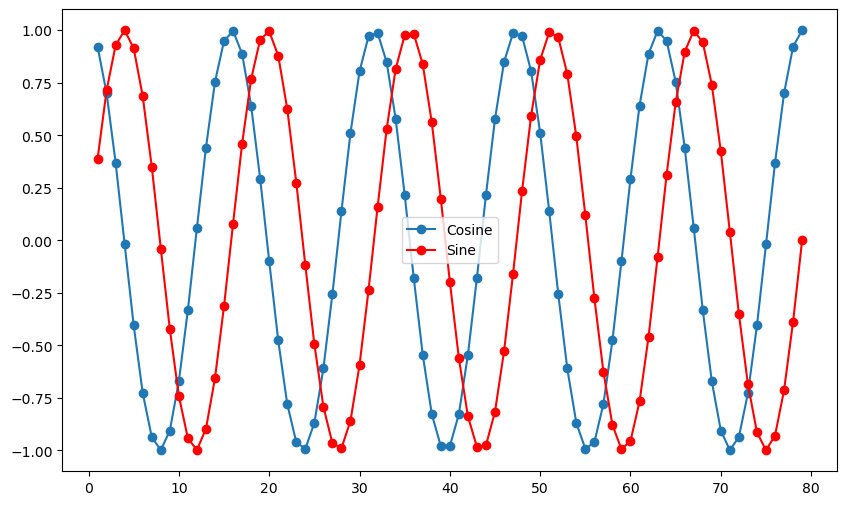

8.881784197001252e-15
6.627323427154129e-16
39.49999999999999
39.5


In [7]:
n = 79
f = 5/n
t = np.arange(1, n+1)
cos_t = np.cos(2 * np.pi * f * t)
sin_t = np.sin(2 * np.pi * f * t)
plt.figure(figsize = (10, 6))
plt.plot(t, cos_t, '-o', label = 'Cosine')
plt.plot(t, sin_t, '-o', color = 'red', label = 'Sine')
plt.legend()
plt.show()
print(np.sum(cos_t)) #should be zero if f is a Fourier frequency
print(np.sum(sin_t)) #should be zero if f is a Fourier frequency
print(np.sum(cos_t ** 2)) #should equal n/2 if f is a Fourier frequency
print(np.sum(sin_t ** 2)) #should equal n/2 if f is a Fourier frequency

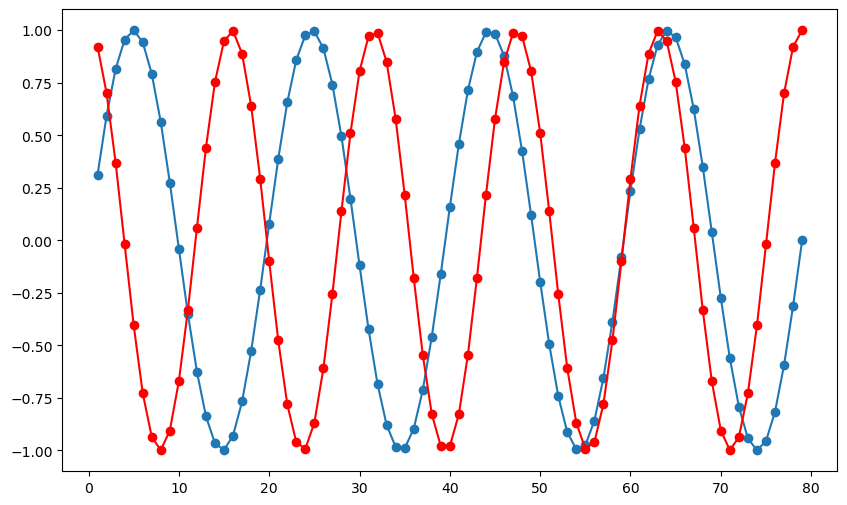

-1.3127843467054297e-15


In [8]:
f1 = 4/n
f2 = 5/n
cos_f1 = np.cos(2 * np.pi * f1 * t)
sin_f1 = np.sin(2 * np.pi * f1 * t)
cos_f2 = np.cos(2 * np.pi * f2 * t)
sin_f2 = np.sin(2 * np.pi * f2 * t)
plt.figure(figsize = (10, 6))
y1 = sin_f1
y2 = cos_f2
plt.plot(t, y1, '-o')
plt.plot(t, y2, '-o', color = 'red')
plt.show()
print(sum(y1 * y2)) #should equal zero if f1 and f2 are distinct Fourier frequencies



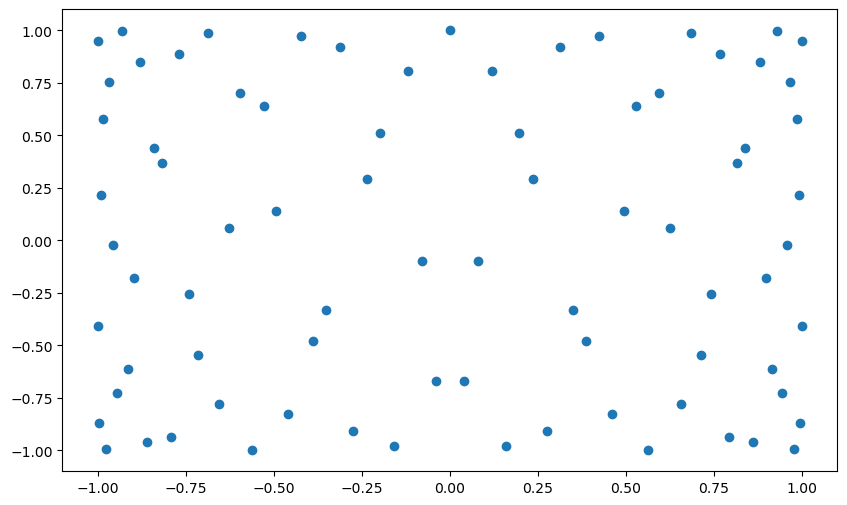

In [9]:
plt.figure(figsize = (10, 6))
plt.scatter(y1, y2) #if f1 and f2 are distinct Fourier frequencies, there should be no linear trend in this scatter plot

## Discrete Fourier Transform

For a dataset $y_0, \dots, y_{n-1}$, its DFT is $b_0, b_1, \dots, b_{n-1}$ where
\begin{equation*}
   b_j = \sum_{t=0}^{n-1} y_t \exp \left(-\frac{2 \pi i j t}{n} \right).
\end{equation*}
for $j = 0, 1, \dots, n-1$. In other words, $b_j$ is a complex number with real part $\sum_t y_t \cos(2 \pi (j/n) t)$ and imaginary part $-\sum_t y_t \sin(2 \pi (j/n) t)$. 

In [102]:
y = np.array([2, -5, 3, 0])
dft_y = np.fft.fft(y)
print(dft_y)
b0 = np.sum(y)
print(b0)
n = 4
#Here is the formula for calculating the real and imaginary parts of b2:
cos_4 = np.array([np.cos(2 * np.pi * 0 * (2/n)), np.cos(2 * np.pi * 1 * (2/n)), np.cos(2 * np.pi * 2 * (2/n)), np.cos(2 * np.pi * 3 * (2/n))])
b1_cos = np.sum(y * cos_4)
sin_4 = np.array([np.sin(2 * np.pi * 0 * (2/n)), np.sin(2 * np.pi * 1 * (2/n)), np.sin(2 * np.pi * 2 * (2/n)), np.sin(2 * np.pi * 3 * (2/n))])
b1_sin = np.sum(y * sin_4)
print(b1_cos, b1_sin)

[ 0.+0.j -1.+5.j 10.+0.j -1.-5.j]
0
10.0 -1.3471114790620886e-15
